In [90]:
%matplotlib inline

from pathlib import Path

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from tqdm import tqdm_notebook as tqdm

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [91]:
# Data from https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass.html#mnist

def load_xy(folder, pbar=True):
    with (folder / 'data').open('r') as f:
        data = f.readlines()
    if pbar:
        data = tqdm(data)
    
    xs = np.zeros((len(data), 784), dtype=np.float32)
    ys = np.zeros(len(data), dtype=np.int32)
    for i, line in enumerate(data):
        ts = line.split()
        ys[i] = int(ts[0])
        for t in ts[1:]:
            idx = t.find(':')
            xs[i][int(t[:idx]) - 1] = int(t[idx + 1:]) / 255
    
    return xs, ys

data = Path('../data/')
x_train, y_train = load_xy(data / 'mnist', pbar=False)
x_valid, y_valid = load_xy(data / 'mnist.t', pbar=False)

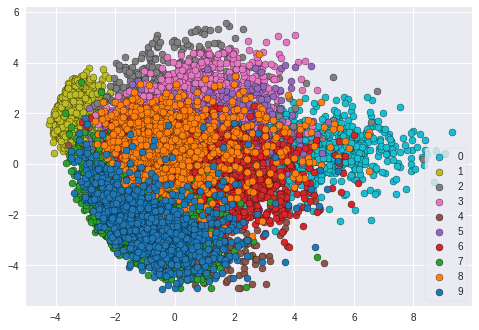

In [92]:
def plot(xs, ys, ax=None, title=''):
    cmap = plt.cm.tab10_r
    xs = PCA(n_components=2).fit_transform(xs)
    ax = ax if ax else plt.subplot()
    for y in range(10):
        data = xs[ys == y, :]
        ax.scatter(data[:, 0], data[:, 1], c=cmap(y / 10), label=y, edgecolors='k')
    ax.legend(loc='lower right', frameon=True)
    ax.set_title(title)
    return ax

ax = plot(x_valid, y_valid)
plt.show()

In [93]:
%%time

pca = PCA(n_components=20)
pca.fit(x_train)
xt, yt = pca.transform(x_train), y_train
xv, yv = pca.transform(x_valid), y_valid
print(pca.explained_variance_ratio_.cumsum())

[ 0.09704707  0.16800669  0.22969797  0.28359246  0.3322807   0.3754032
  0.40812269  0.4369618   0.4645822   0.48815233  0.50924432  0.52947432
  0.54663259  0.56355375  0.57934022  0.59416974  0.60741514  0.62018365
  0.63205522  0.64358187]
CPU times: user 7.66 s, sys: 9.86 s, total: 17.5 s
Wall time: 6.37 s


In [94]:
%%time

svc = SVC(C=1.0, kernel='poly', verbose=True)
svc.fit(xt, yt)
print(svc.score(xv, yv))

[LibSVM]0.9756
CPU times: user 26.7 s, sys: 9.02 ms, total: 26.7 s
Wall time: 26.9 s


In [95]:
%%time

rf = RandomForestClassifier(n_estimators=20)
rf.fit(x_train, y_train)
print(rf.score(x_valid, y_valid))

0.9611
CPU times: user 10.1 s, sys: 8.82 ms, total: 10.1 s
Wall time: 10.3 s


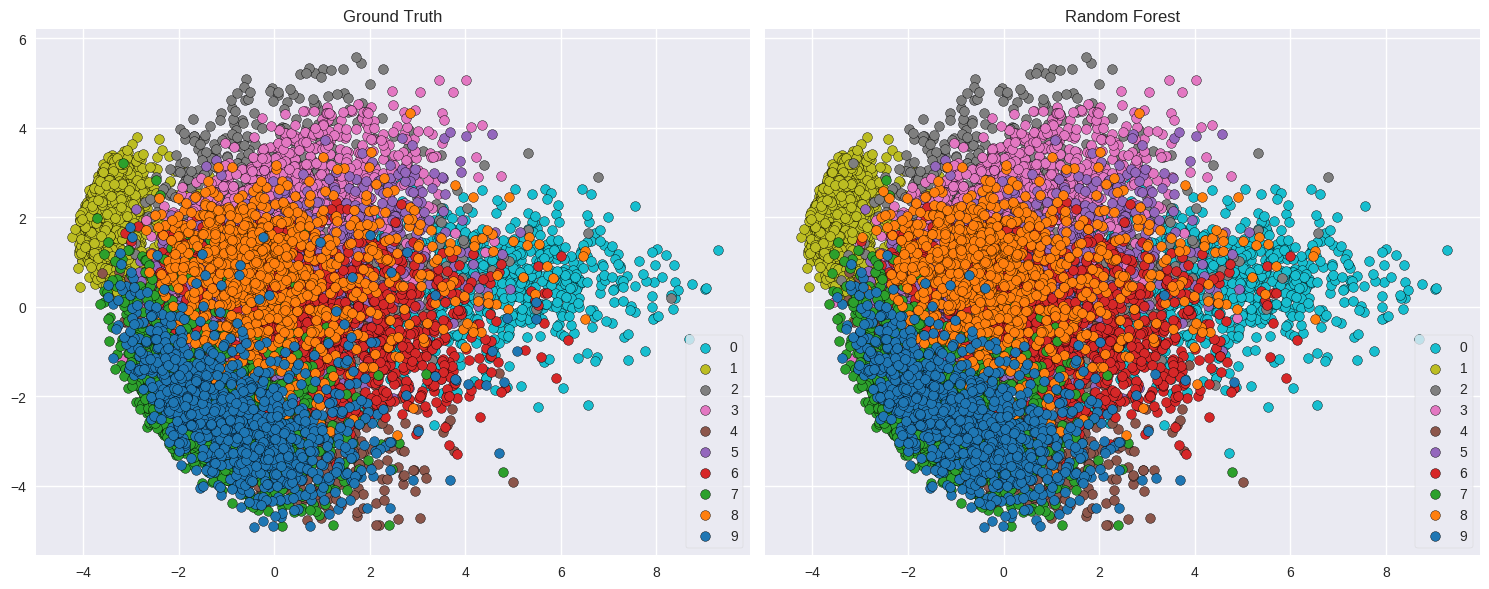

In [96]:
y_true = y_valid
y_pred = rf.predict(x_valid)

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 6), dpi=100)
plot(x_valid, y_true, ax[0], 'Ground Truth')
plot(x_valid, y_pred, ax[1], 'Random Forest')
fig.tight_layout()
plt.show()

In [ ]:
# TODO
# 將 TP, FN 變淡，TN, FP 強調